In [3]:
import tensorflow as tf   

In [4]:
mnist = tf.keras.datasets.mnist

After loading the MNIST data, Devide into train and Test datasets

In [5]:
## unpacking the dataset into train and test datasets
(x_train,y_train),(x_test,y_test) = mnist.load_data()

jadi disini tuh ada 2 data, data testing sama data training
yang dilakukan adalah melakukan pemisahan antara features dan target

In [6]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


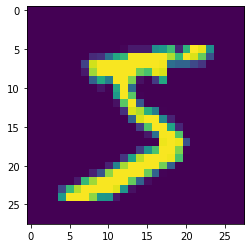

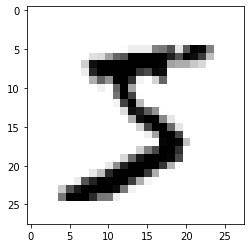

In [7]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show() #untuk melihat graphnya
# sekarang lakukan perubahan imagenya ini menjadi bentuk biner
plt.imshow(x_train[0],cmap=plt.cm.binary)

Checking the values of each pixel, before normalization

In [8]:
print(x_train[0].shape)

(28, 28)


In [9]:
print (x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

Do Normalization, jadi ini nantinya akan mengganti range 0 ->255 ke 0->1

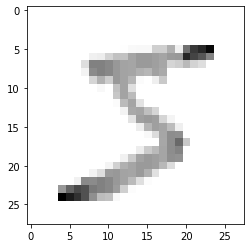

In [10]:
x_train = tf.keras.utils.normalize (x_train,axis =1)
x_test = tf.keras.utils.normalize (x_test,axis =1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [11]:
print (x_train[0])


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Resizing image to make it suitable for apply convolution operation

In [12]:
import numpy as np
img_size = 28
x_trainr=np.array(x_train).reshape(-1,img_size,img_size,1)
x_testr=np.array(x_test).reshape(-1,img_size,img_size,1)
print(x_trainr[0].shape)
print(x_testr.shape)
print("parameter diatas berarti ada (60ribu array,28 pixel horizontal, 28 pixel vertical,1 increasing dimension for kernel operation")

(28, 28, 1)
(10000, 28, 28, 1)
parameter diatas berarti ada (60ribu array,28 pixel horizontal, 28 pixel vertical,1 increasing dimension for kernel operation


Creating a Deep Neural network

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [14]:
model = Sequential()

#first convolution layer
model.add(Conv2D(64,(3,3),input_shape = x_trainr.shape[1:]))
model.add(Activation("relu")) #activation function to make it non-linear
model.add(MaxPooling2D(pool_size=(2,2)))

#second convolution layer
model.add(Conv2D(64,(3,3),input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#third convolution layer
model.add(Conv2D(64,(3,3),input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Fully Connected Layer 1
model.add (Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

# Fully Connected Layer 2
model.add(Dense(32))
model.add(Activation("relu"))

# Fully Connected Layer 
model.add(Dense(10))
model.add(Activation('softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [16]:
print(len(x_trainr))

60000


In [17]:
model.compile(loss = "sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

Semakin banyak data training dan semakin banyak epoch yang dilakukan tidak dapat menentukan tingkat akurasinya

yang menjadi pertanyaan kenapa kecepatan learning dari cnn ini lebih cepet daripada metode LSTM ???


RATA RATA LEARNING PADA CNN 55MS/STEP , RATA RATA LEARNING LSTM 151MS/STEP

In [18]:
model.fit(x_trainr,y_train,epochs =10,validation_split=0.3)

Epoch 1/10
1313/1313 [==============================] - 47s 35ms/step - loss: 0.3351 - accuracy: 0.8932 - val_loss: 0.1145 - val_accuracy: 0.9643
Epoch 2/10
1313/1313 [==============================] - 40s 30ms/step - loss: 0.1037 - accuracy: 0.9690 - val_loss: 0.0862 - val_accuracy: 0.9728
Epoch 3/10
1313/1313 [==============================] - 41s 31ms/step - loss: 0.0715 - accuracy: 0.9775 - val_loss: 0.0745 - val_accuracy: 0.9783
Epoch 4/10
1313/1313 [==============================] - 41s 31ms/step - loss: 0.0589 - accuracy: 0.9813 - val_loss: 0.0628 - val_accuracy: 0.9799
Epoch 5/10
1313/1313 [==============================] - 42s 32ms/step - loss: 0.0451 - accuracy: 0.9857 - val_loss: 0.0837 - val_accuracy: 0.9749
Epoch 6/10
1313/1313 [==============================] - 43s 32ms/step - loss: 0.0366 - accuracy: 0.9883 - val_loss: 0.0591 - val_accuracy: 0.9817
Epoch 7/10
1313/1313 [==============================] - 43s 33ms/step - loss: 0.0305 - accuracy: 0.9901 - val_loss: 0.0667 -

In [19]:
test_loss,test_acc = model.evaluate(x_testr,y_test)
print(test_loss)
print(test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0525 - accuracy: 0.9864
0.052504125982522964
0.9864000082015991


In [20]:
predictions = model.predict([x_testr])

In [21]:
print(predictions)

[[7.16934789e-10 8.48570920e-08 5.02628097e-07 ... 9.99995947e-01
  7.48678952e-10 1.22833237e-08]
 [3.22522465e-05 3.99456439e-07 9.99956965e-01 ... 8.80801210e-08
  8.91632681e-06 3.49104425e-08]
 [7.83741995e-12 9.99999762e-01 2.62244848e-09 ... 3.93478716e-09
  3.30156125e-10 2.94063852e-07]
 ...
 [1.09102816e-14 2.20509416e-10 1.33811205e-15 ... 8.55269956e-13
  7.77511527e-11 1.29513040e-08]
 [1.29074451e-09 7.21842378e-11 1.81741056e-13 ... 2.25466781e-12
  5.42549898e-08 2.28298216e-08]
 [9.66729630e-09 1.54617385e-06 1.28950198e-10 ... 3.54179429e-11
  4.41014891e-10 1.38704683e-08]]


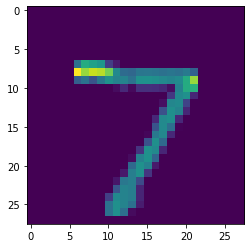

In [22]:
plt.imshow(x_test[0])

In [23]:
print(np.argmax(predictions[0]))

7


In [24]:
import cv2

In [25]:
img = cv2.imread('empat2.png')

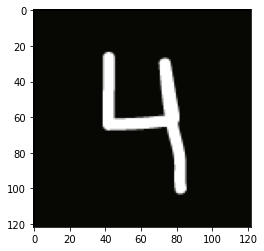

In [26]:
plt.imshow(img)

In [27]:
print(img.shape)

(122, 122, 3)


In [28]:
imggray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

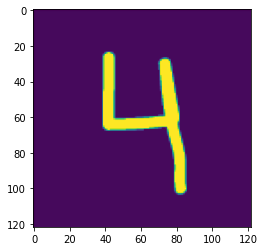

In [29]:
plt.imshow(imggray)

In [30]:
imggray.shape

(122, 122)

In [44]:
resizedimg = cv2.resize(imggray,(28,28))

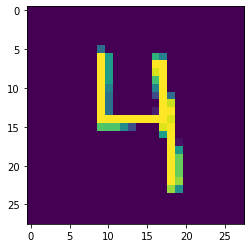

In [45]:
plt.imshow(resizedimg)

In [49]:
resizedimgnormalization = tf.keras.utils.normalize (resizedimg,axis =1)

In [50]:
resizedimgnormalization2=np.array(resizedimgnormalization).reshape(-1,img_size,img_size,1)


In [51]:
resizedimgnormalization2.shape

(1, 28, 28, 1)

In [52]:
predictionsbaru = model.predict([resizedimgnormalization2])


In [53]:
print(np.argmax(predictionsbaru))

4
